# Importing experiment data

In [1]:
from pyfitit import *

project = loadProject('FeterpyProject.py', expFile = 'exp_excited.txt')
projectBase = loadProject('FeterpyProject.py', expFile = 'exp_ground.txt')
spectrumBase = parseFdmnesFolder('fdmnes_fdm_5')

Using TensorFlow backend.


# Importing XANES calculated for support points

In [2]:
sample = readSample('IHS_729')
sampleCompare = readSample('line_200')

# Construct the direct estimator

In [3]:
convolutionParams = {'Gamma_hole':6.1305, 'Ecent':27.771, 'Elarg':1, 'Efermi':10.075, 
                     'Gamma_max':13.238, 'shift':7112.6, 'norm':None}

directEstimator = constructDirectEstimator('Extra Trees', project, convolutionParams, 
    CVcount=2, probabilityIntervals=4, 
    diffFrom = {'projectBase':projectBase, 'spectrumBase':spectrumBase, 'purity':1})

# Compare different machine learning methods
**sampleTest** should be linear sample

Spectra are smoothed **before** training and prediction

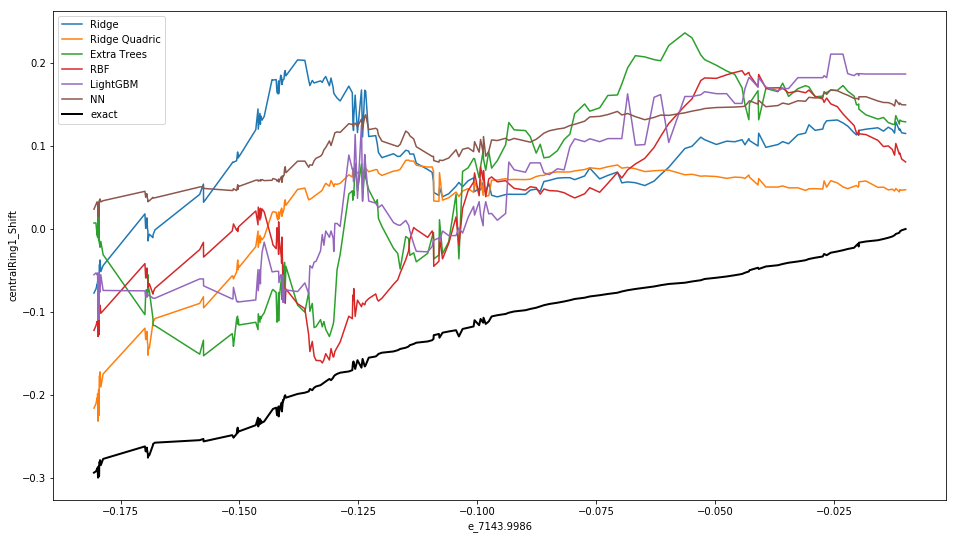

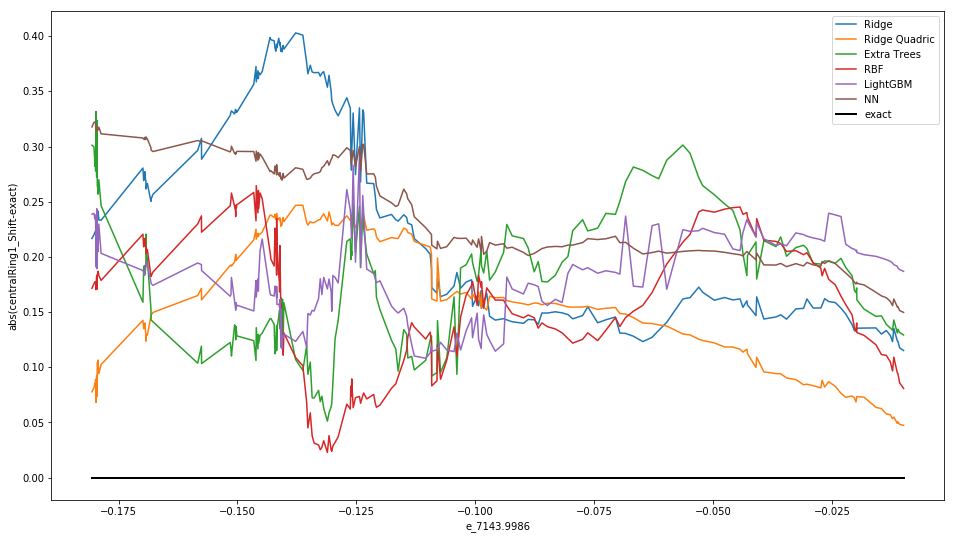

In [4]:
directEstimator.compareDifferentMethods(sampleTrain = sample, sampleTest = sampleCompare, 
    energyPoint=7143, geometryParam='centralRing1_Shift', 
    doCV = False, folderToSaveResult = 'results/directMethodsCompare_centralRing1_Shift_Diff')

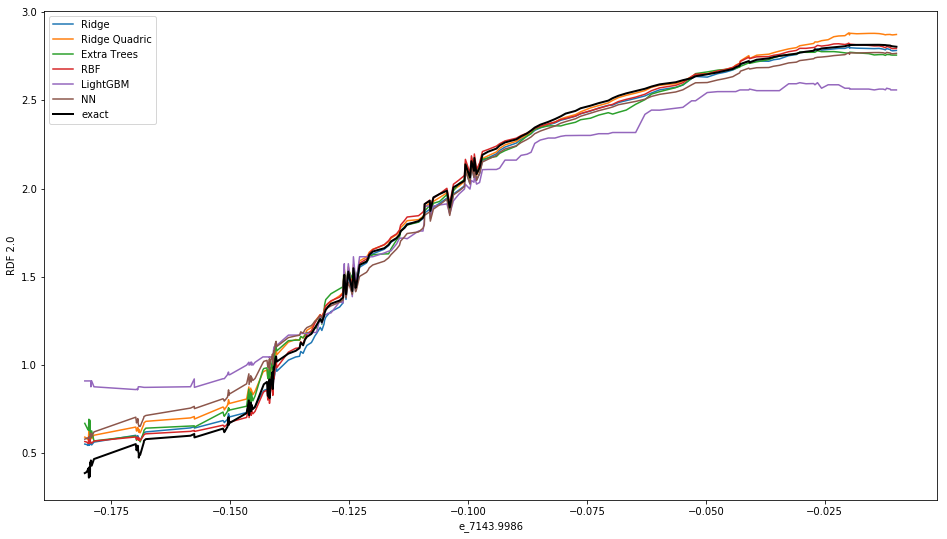

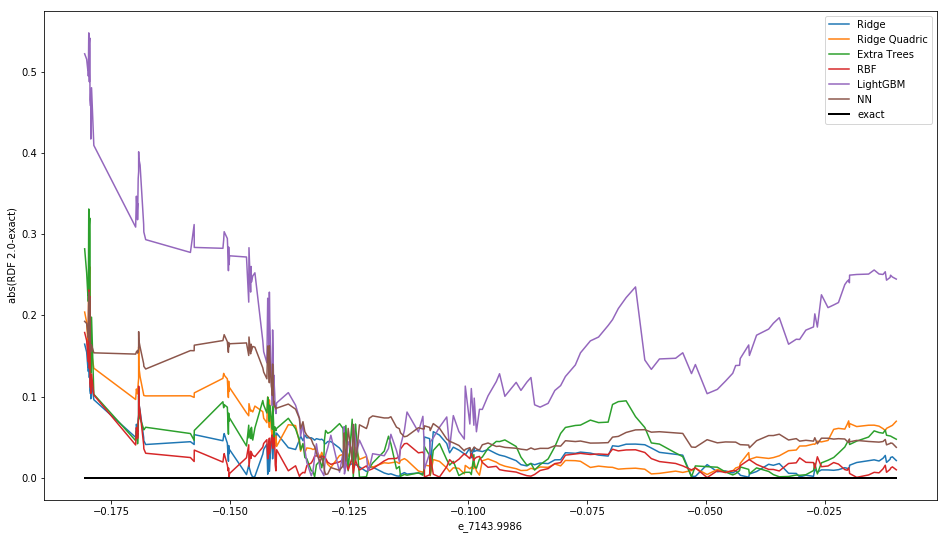

In [5]:
directEstimator.compareDifferentMethods(sampleTrain = sample, sampleTest = sampleCompare, 
    energyPoint=7143, geometryParam={'type':'RDF', 'value':2, 'params':{'sigma':0.2, 'atomName':'N'}}, 
    doCV = False, folderToSaveResult = 'results/directMethodsCompare_RDF_Diff')

# Train the estimator

In [6]:
directEstimator.fit(sample)

2  cross validation of regression:
centralRing1_Shift relToConstPredError = 0.736 RMSE = 0.198
centralRing2_Shift relToConstPredError =  0.73 RMSE = 0.197
sideRings1_Elong relToConstPredError = 0.629 RMSE = 0.183
sideRings1_Shift relToConstPredError = 0.892 RMSE = 0.218
sideRings2_Elong relToConstPredError = 0.639 RMSE = 0.184
sideRings2_Shift relToConstPredError = 0.927 RMSE = 0.222


# Predict the geometry for experimetal data

In [7]:
directEstimator.predict(project.spectrum, folderToSaveResult = 'results/directMethodResults_Diff', smooth=False)

ValueError: cannot reshape array of size 7 into shape (6,)

In [ ]:
m = project.moleculeConstructor({'centralRing1_Shift':0, 'sideRings1_Shift':0, 'sideRings1_Elong':0, 
                                 'centralRing2_Shift':0, 'sideRings2_Shift':0, 'sideRings2_Elong':0})
directEstimator.predictRDF(project.spectrum, folderToSaveResult = 'results/directMethodResults_Diff', 
                           atomName = 'N', smooth=False, rMin=1, rMax=4, rCount=50, sigma=0.2, check=False, 
                           extraMolecules={'all params = zero':m})

In [ ]:
directEstimator.predictAngleDF(project.spectrum, folderToSaveResult = 'results/directMethodResults_Diff', 
                               atomName = 'N', smooth=False, angleCount=50, sigma=10, check=False, 
                               extraMolecules={'all params = zero':m})